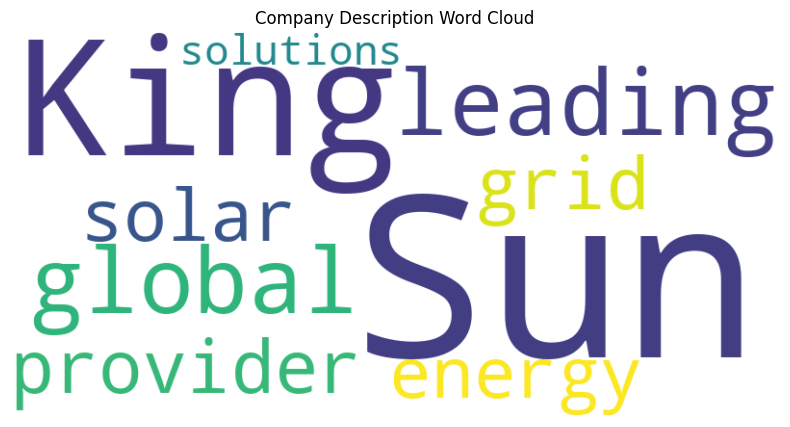

In [3]:
import os
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure directory exists
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# JSON company profile
company_json = '''
{
    "Company Name": "Sun King",
    "Description": "Sun King is a leading global provider of off-grid solar energy solutions...",
    "Ownership": "Private",
    "Management Team": {
        "CEO": "T. Assumed - Experienced leader in sustainable energy.",
        "COO": "A. Assumed - Operations expert in African markets."
    },
    "Website": "https://ng.sunking.com",
    "Address": "19 Adekunle Fajuyi Way, Ikeja GRA, Lagos, Nigeria",
    "Sector": "Renewable Energy / Solar Technology",
    "Regions of Operation": ["Nigeria", "Kenya", "India", "Philippines"],
    "Employees": 3000,
    "Revenue (est.)": "USD 200M [Assumed]",
    "Partnerships": ["IFC", "Stanbic IBTC Bank"]
}
'''

# Parse JSON and create DataFrame
data = json.loads(company_json)
df = pd.json_normalize(data)

# --- Save as LaTeX ---
latex_output = df.T.reset_index()
latex_output.columns = ["Detail", "Information"]
latex_str = latex_output.to_latex(index=False)

with open(f"{output_dir}/company_profile_latex.tex", "w") as f:
    f.write(latex_str)

# --- Save as CSV ---
df.to_csv(f"{output_dir}/company_profile.csv", index=False)

# --- Save as Excel ---
df.to_excel(f"{output_dir}/company_profile.xlsx", index=False)

# --- Generate Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate(data["Description"])

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Company Description Word Cloud")
plt.savefig(f"{output_dir}/company_wordcloud.png")
plt.show()
